### How to use search results 

In [1]:
import pandas as pd
import copy
import matplotlib.pyplot as plt 
import seaborn as sns
from seaborn import color_palette, set_style, palplot
#plt.style.use('ggplot')
%matplotlib inline

##### read search results into data frame 

In [2]:
search_result_path ='./data/search_results.csv'
df_search = pd.read_csv(search_result_path)
df_search.drop("Unnamed: 0",axis=1,inplace= True)
df_search.doc_id = df_search.doc_id.astype(str)
df_search.head()

,doc_id,para_id,context,para_word_count,investor confidence,nonperforming,npls,risk premium,restructuring,asset quality,...,maturity transformation,capital flow reversal,liquidity crunches,cds premia,hard landings,risk appetites,counterparty credit risk,depositor runs,sovereign defaults,solvents
0,9781451821079,9781451821079_0,1. At the conclusion of the last Article IV co...,106.0,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9781451821079,9781451821079_17,10. The lack of financial services and access ...,107.0,NaN,1.0,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9781451821079,9781451821079_19,12. During 1998–2001 and the first half of 200...,228.0,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,9781451821079,9781451821079_30,A strong implementation of the governance agen...,304.0,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,9781451821079,9781451821079_33,a slower implementation of the governance agen...,109.0,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### Aggregate by doc id 

In [3]:
df_search.fillna(0,inplace=True)   ## replac NaN with 0 
search_keys = copy.deepcopy(df_search.columns.values.tolist())[4:]      ## get all keywords 
# here you can do some filter, for instance get ride of some keys that are revelent 
search_keys.remove('restructuring')  ## delete restructuring, it is everywhere, not very useful
df_search['total_key_frequency'] = df_search[search_keys].sum(axis=1)   ## generage a total keyword sum variable 

In [4]:
df_agg = df_search.groupby(['doc_id'],as_index = False)['total_key_frequency'].sum()
#df_agg = df_agg[df_agg.total_key_frequency != 0 ]
df_agg.head()

,doc_id,total_key_frequency
0,9781451800029,1.0
1,9781451800043,9.0
2,9781451800067,16.0
3,9781451800098,4.0
4,9781451800104,11.0


In [5]:
#### Merge metadata filds 
meta_path ='./data/Staff_reports_meta_all.xlsx'
df_meta = pd.read_excel(meta_path,'Sheet1')
df_meta.head()

,doc_id,pdfisbn,title,year_final,imf_country_name,country_code,department,income,document_word_count
0,9781475536485,9.781476e+12,Republic of Azerbaijan : 2016 Article IV Consu...,2016,Azerbaijan,912.0,MCD,EM,9669.0
1,9781475536263,9.781476e+12,Jordan : Request for an Extended Arrangement U...,2016,Jordan,439.0,MCD,EM,8594.0
2,9781475535556,9.781476e+12,Bosnia and Herzegovina : Request for Extended ...,2016,Bosnia and Herzegovina,963.0,EUR,EM,6707.0
3,9781475535860,9.781476e+12,Kiribati : 2016 Article IV Consultation-Press ...,2016,Kiribati,826.0,APD,LIC,9506.0
4,9781475532593,9.781476e+12,Ecuador : Purchase Under the Rapid Financing I...,2016,Ecuador,248.0,WHD,EM,3332.0


In [6]:
df = pd.merge(df_agg,df_meta,on='doc_id')  ## merge, inner join
print("Total Number of Documents: {}".format(len(df)))
df.head()

Total Number of Documents: 2901


,doc_id,total_key_frequency,pdfisbn,title,year_final,imf_country_name,country_code,department,income,document_word_count
0,9781451800029,1.0,9.781452e+12,Kingdom of the Netherlands—Aruba : Staff Repor...,1999,Aruba,533.0,NaN,EM,5208.0
1,9781451800043,9.0,9.781453e+12,The Kingdom of the Netherlands-Aruba : 2002 Ar...,2002,Aruba,533.0,NaN,EM,4185.0
2,9781451800067,16.0,9.781453e+12,Kingdom of the Netherlands—Aruba : Staff Repor...,2001,Aruba,533.0,NaN,EM,7485.0
3,9781451800098,4.0,9.781452e+12,Kingdom of the Netherlands—Aruba : Staff Repor...,2005,Aruba,533.0,NaN,EM,5642.0
4,9781451800104,11.0,9.781453e+12,Kingdom of the Netherlands : Aruba: 2007 Arti...,2007,Aruba,533.0,NaN,EM,4854.0


#### Aggregate it again by country and year

In [7]:
df_agg = df.groupby(['year_final','imf_country_name','country_code','income'],as_index = False)['total_key_frequency','document_word_count'].sum()
#df_agg.index = pd.to_datetime(df_agg['year_final'],format='%Y')
df_agg['freq_norm'] = df_agg['total_key_frequency']/df_agg['document_word_count']*1000    ## keyword frequencey per 1000 words 
df_agg.head(10)

,year_final,imf_country_name,country_code,income,total_key_frequency,document_word_count,freq_norm
0,1995,Antigua and Barbuda,311.0,EM,2.0,3950.0,0.506329
1,1995,Argentina,213.0,EM,6.0,6317.0,0.949818
2,1995,Armenia,911.0,EM,9.0,7963.0,1.130227
3,1995,Australia,193.0,AM,2.0,7242.0,0.276167
4,1995,Austria,122.0,AM,2.0,5203.0,0.384394
5,1995,Azerbaijan,912.0,EM,28.0,15987.0,1.751423
6,1995,"Bahamas, The",313.0,EM,1.0,4107.0,0.243487
7,1995,Bangladesh,513.0,LIC,14.0,8651.0,1.618310
8,1995,Belarus,913.0,EM,21.0,13135.0,1.598782
9,1995,Belgium,124.0,AM,3.0,5894.0,0.508992


### Now let's take a look at data for US 

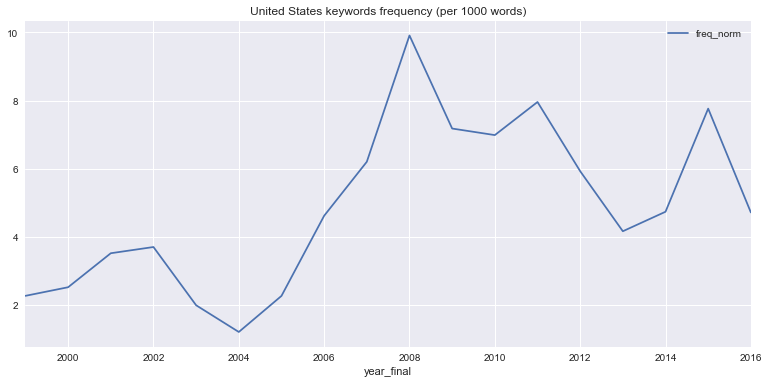

In [8]:
countryname= "United States"
countrycode = 111

df_plot = df_agg[df_agg['country_code']==countrycode].copy()
df_plot.plot(x='year_final',y='freq_norm',figsize=(13,6),title=countryname + " keywords frequency (per 1000 words)")

#### You can do this for any other country you are interested in 